In [2]:
#import pandas and initialize dataset
#dataset are arrests made in pittsburgh neighborhoods between 2016-2022
#the idea is to find the neighborhood(s) with least arrests since less crime = safer neighborhood
import pandas as pd

arrest_data = pd.read_csv("arrest_data.csv")
arrest_data.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [3]:
#Lets find the amount of arrests made in each neighborhood
arrest_dict = dict()
for index, row in arrest_data.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    if neighborhood not in arrest_dict:
        arrest_dict[neighborhood] = 1
    else:
        arrest_dict[neighborhood] += 1
#print(arrest_dict)


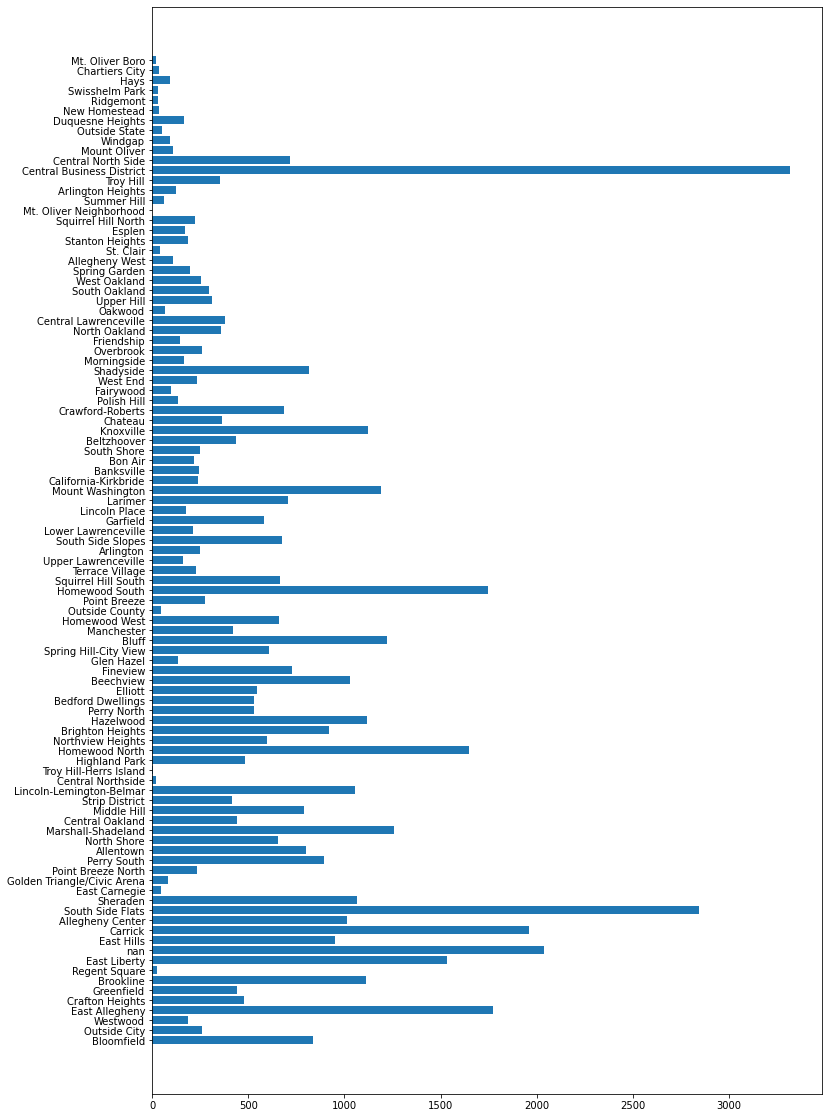

In [5]:
#Now that we have a dictionary where the keys are the neighborhoods, plot the data
import matplotlib.pyplot as mpl
neighborhoods = list(arrest_dict.keys())
arrests = list(arrest_dict.values())
mpl.barh(range(len(arrest_dict)), arrests, tick_label=neighborhoods )
mpl.rcParams["figure.figsize"]=(12, 20)
mpl.show()

In [6]:
#Instantiate population data to get arrest:population ratio
population_data = pd.read_csv("population_data.csv")
population_data.head()

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_pop,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102


In [7]:
#iterate through each neighborhood and get population data, as well as calculate ratio data
population_dict = dict()
arrest_ratio_dict = dict()
for index, row in population_data.iterrows():
    neighborhood = row['Neighborhood']
    population = row['2020_Total_Population']
    if neighborhood in arrest_dict:
        population_dict[neighborhood] = population
        arrest_ratio_dict[neighborhood] = arrest_dict[neighborhood] / population
#print(population_dict)
#print(arrest_ratio_dict)

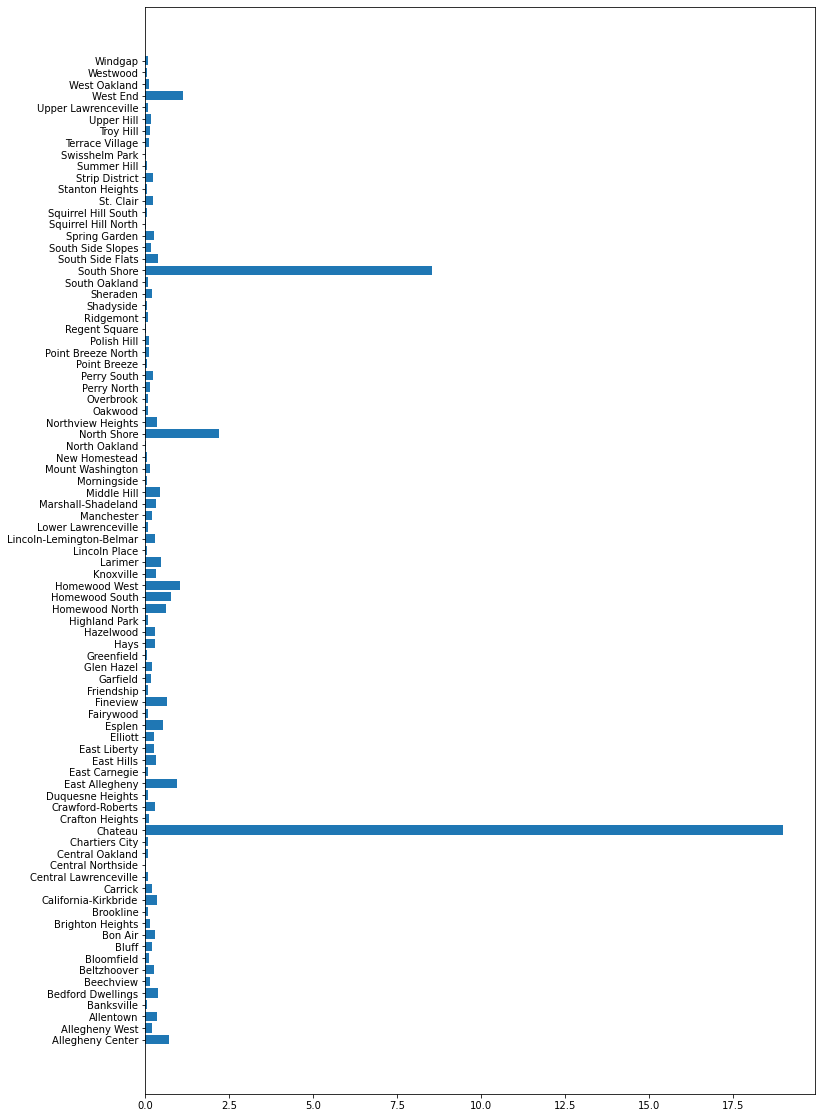

In [8]:
#now plot the data
neighborhoods = list(arrest_ratio_dict.keys())
arrest_ratio = list(arrest_ratio_dict.values())
mpl.barh(range(len(arrest_ratio_dict)), arrest_ratio, tick_label=neighborhoods )
mpl.rcParams["figure.figsize"]=(12, 20)
mpl.show()

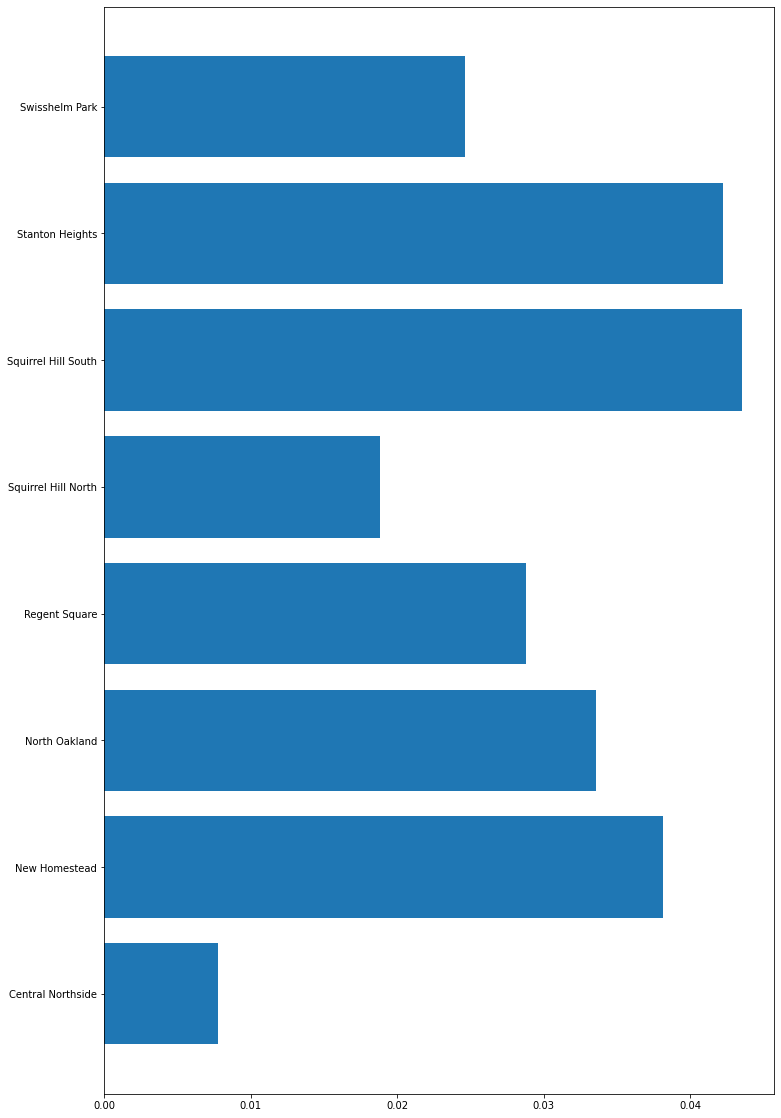

In [10]:
ratios_filtered = { key:value for (key,value) in arrest_ratio_dict.items() if value < 0.05}

neighborhoods = list(ratios_filtered.keys())
arrest_ratio = list(ratios_filtered.values())
mpl.barh(range(len(ratios_filtered)), arrest_ratio, tick_label=neighborhoods )
mpl.rcParams["figure.figsize"]=(12, 20)
mpl.show()

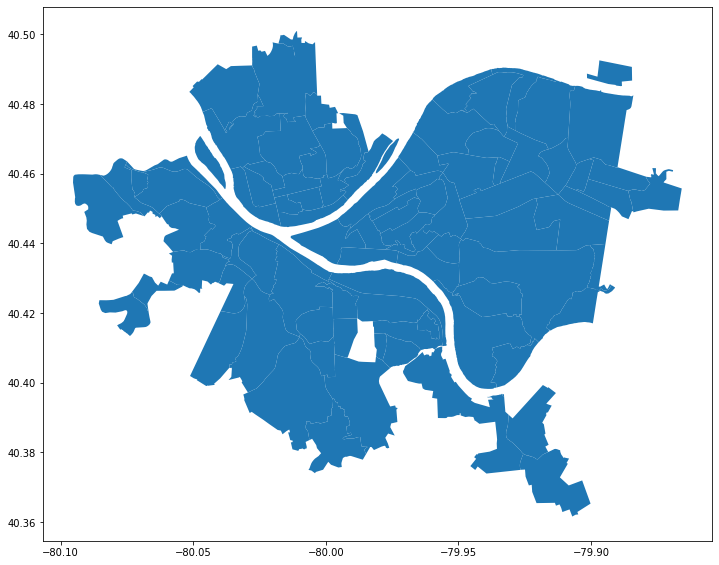

In [11]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [17]:
ratio_df = pd.DataFrame(ratios_filtered,index=[0])